In [1]:
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
%matplotlib inline
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('modulabs-ds5-credit-card-fraud-detection/train.csv')
df_test = pd.read_csv('modulabs-ds5-credit-card-fraud-detection/test.csv')

데이터 시각화

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [4]:
df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,85441.000000,61091.567090,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,...,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445,87.336704,0.002107
std,49329.817362,27828.109419,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,...,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315,245.954429,0.045851
min,0.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42720.500000,41216.500000,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,...,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054,5.480000,0.000000
50%,85441.000000,60776.000000,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,...,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152,21.890000,0.000000
75%,128161.500000,78622.000000,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,...,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302,76.720000,0.000000
max,170882.000000,120396.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [6]:
df = df.drop(columns=['id'])

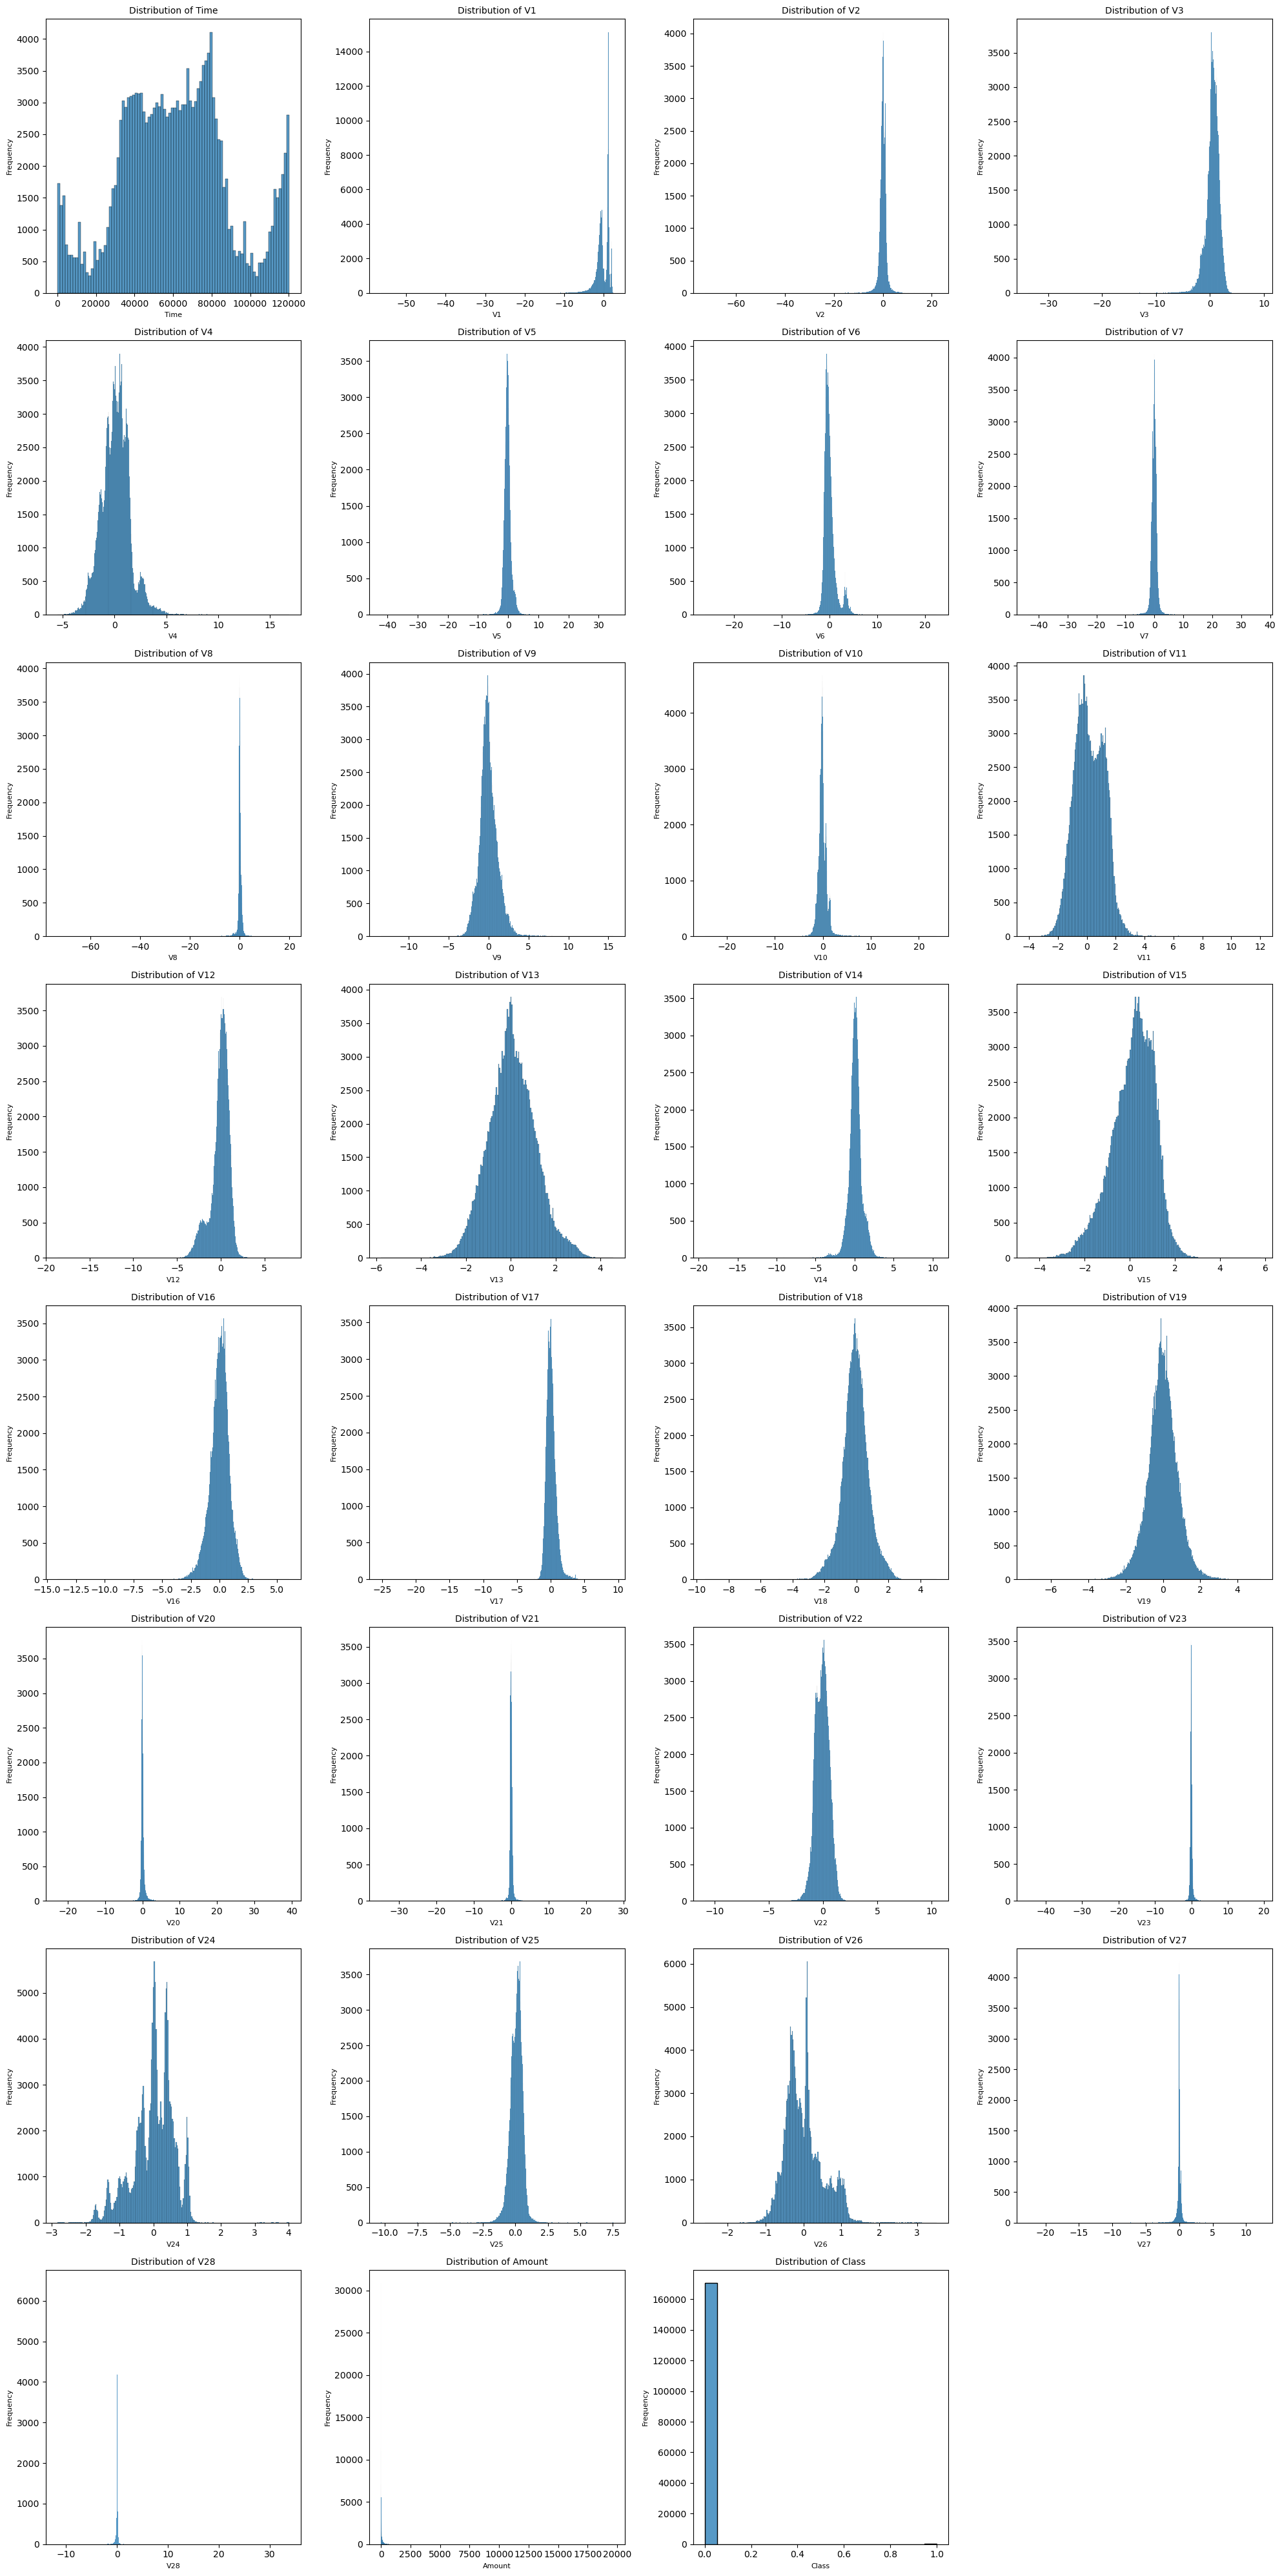

In [7]:
num_plots = len(df.columns)
ncols = 4  
nrows = math.ceil(num_plots / ncols) 

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows)) 
axes = axes.flatten()


for idx, column in enumerate(df.columns):
    ax = axes[idx]
    
    if df[column].dtype in [np.int64, np.float64]:
        sns.histplot(df[column], ax=ax)
        ax.set_title(f'Distribution of {column}', fontsize=10)
        ax.set_xlabel(column, fontsize=8)
        ax.set_ylabel('Frequency', fontsize=8)
    else:
        sns.countplot(x=df[column], order=df[column].value_counts().index, ax=ax)
        ax.set_title(f'Count of {column}', fontsize=10)
        ax.set_xlabel(column, fontsize=8)
        ax.set_ylabel('Count', fontsize=8)
        ax.tick_params(axis='x', rotation=45)

for idx in range(num_plots, nrows * ncols):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


C:\Users\Coco\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


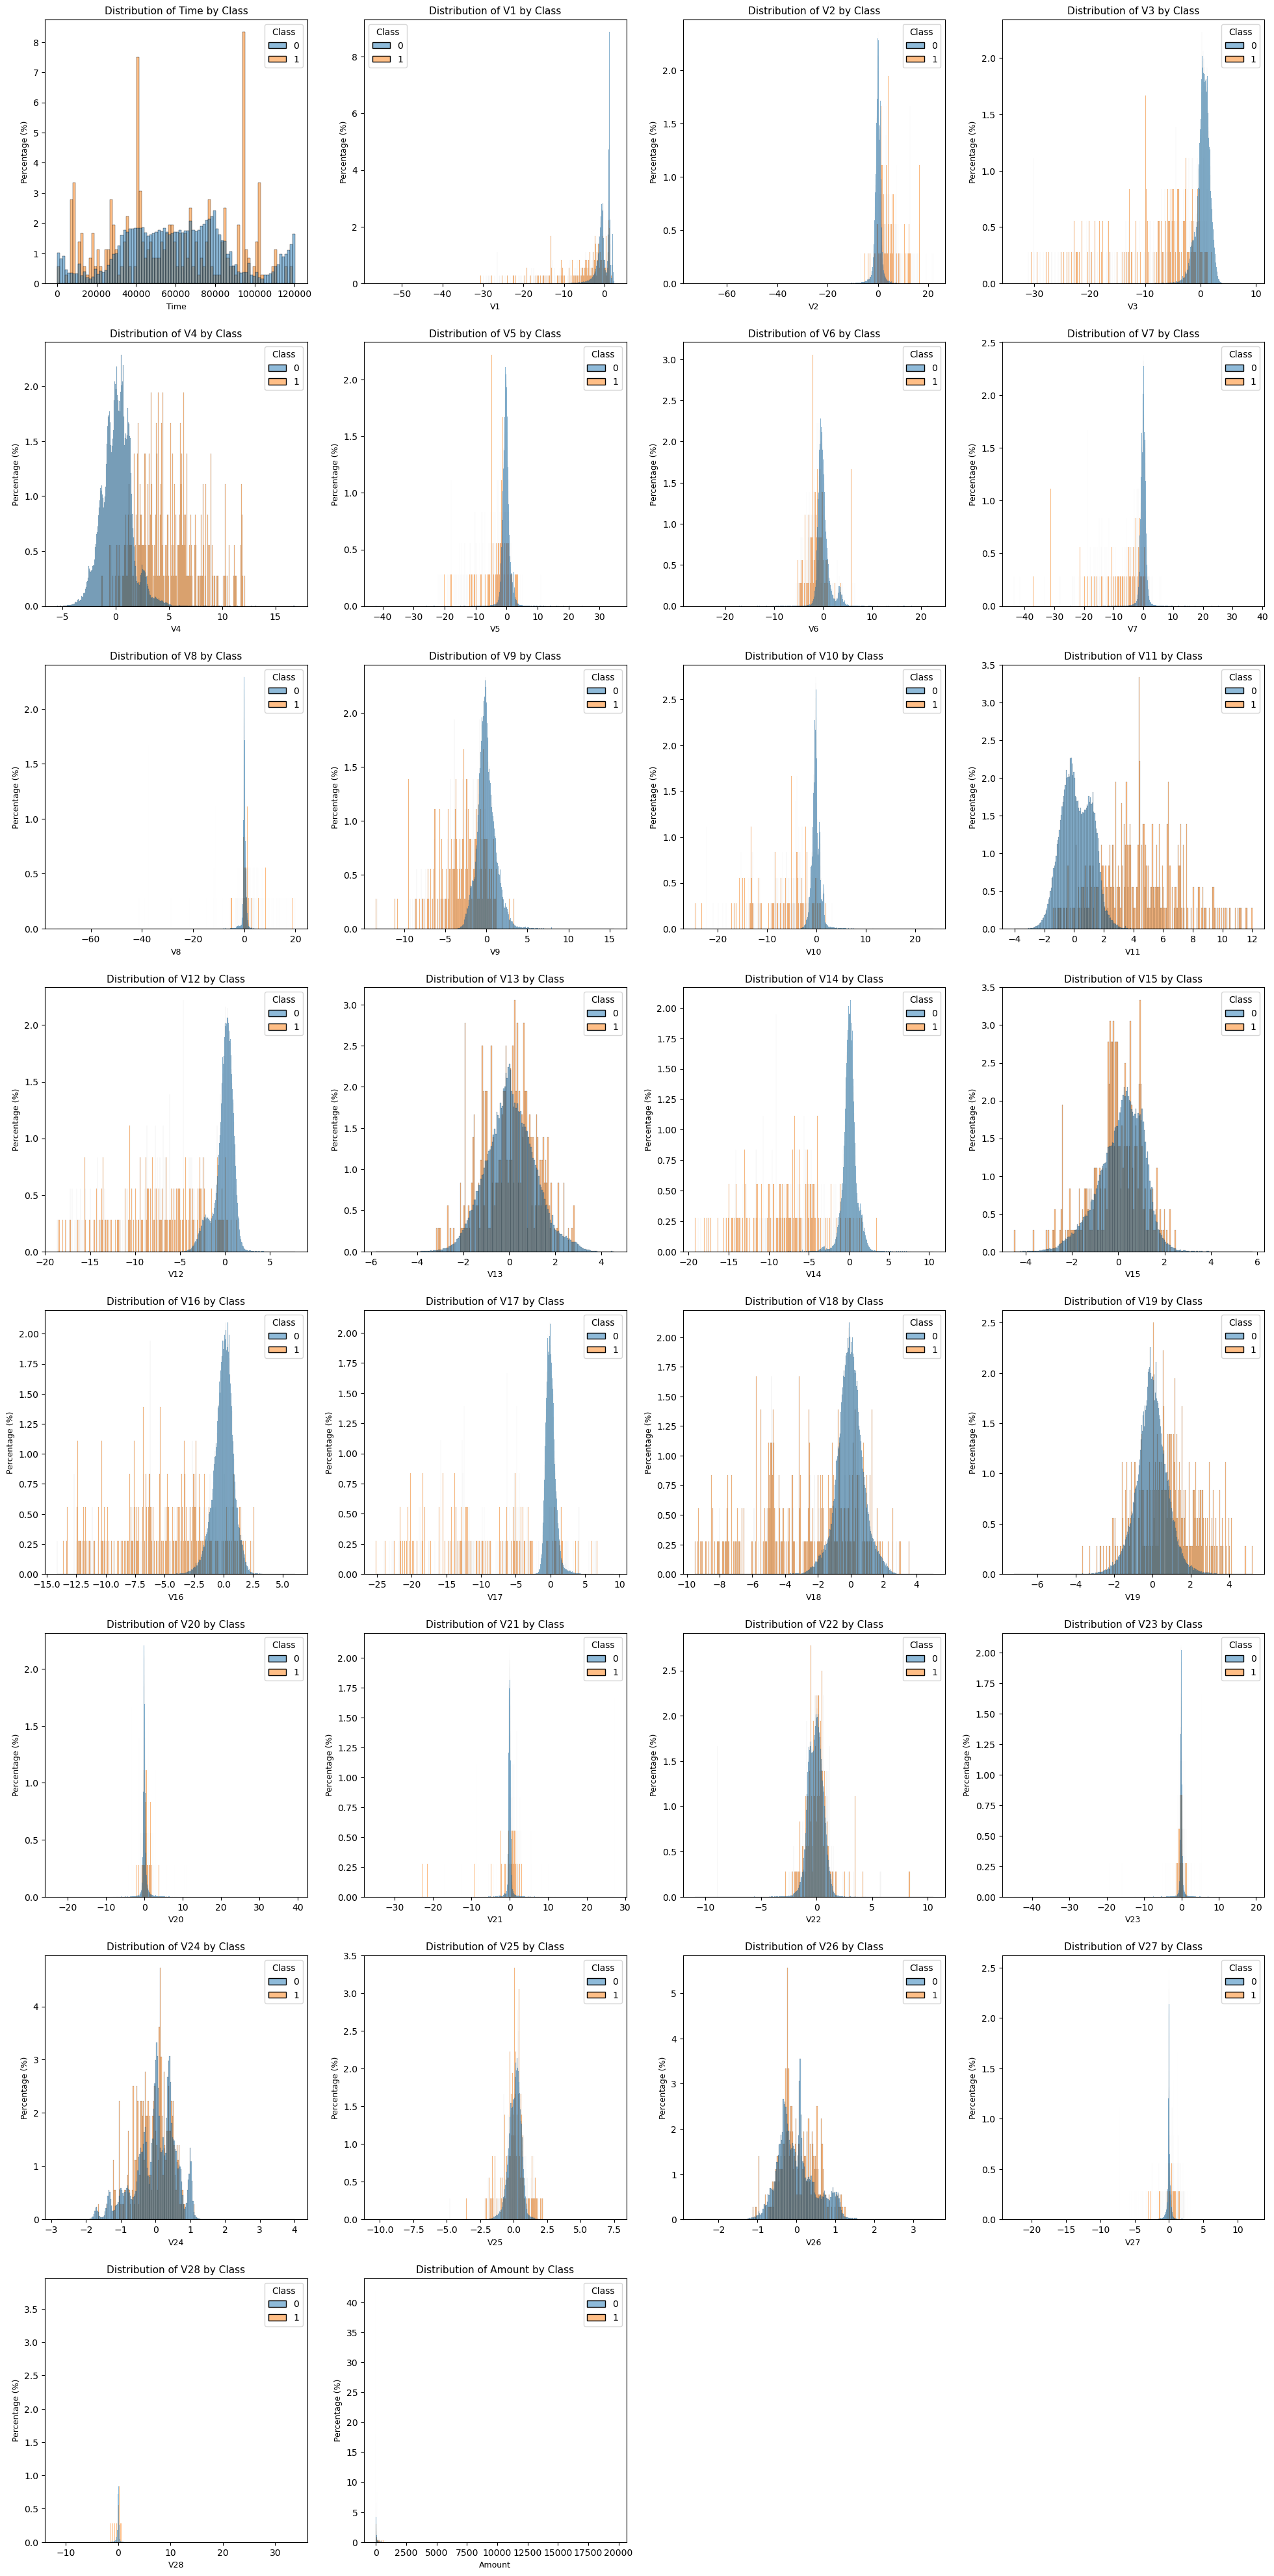

In [8]:
#Class 0과 1 일 때 데이터 분포 비교
features = df.drop(columns=['Class'])
num_plots = len(features.columns)

ncols = 4
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

for idx, feature in enumerate(features):
    ax = axes[idx]
    
    if df[feature].dtype in [np.int64, np.float64]:
        sns.histplot(data=df, x=feature, hue='Class', stat='percent', common_norm=False, ax=ax)
        ax.set_title(f'Distribution of {feature} by Class', fontsize=11)
        ax.set_ylabel('Percentage (%)', fontsize=9)
        ax.set_xlabel(feature, fontsize=9)
    else:
        prop_df = df.groupby('Class')[feature].value_counts(normalize=True).mul(100).rename('percent').reset_index()       
        sns.barplot(data=prop_df, x=feature, y='percent', hue='Class', ax=ax)
        ax.set_title(f'Proportion of {feature} by Class', fontsize=11)
        ax.set_ylabel('Percentage (%)', fontsize=9)
        ax.tick_params(axis='x', rotation=45)
        ax.set_xlabel(feature, fontsize=9)

for idx in range(num_plots, nrows * ncols):
    axes[idx].set_visible(False)

plt.tight_layout(pad=2.0)
plt.show()


In [ ]:
해석: V3,V4,V10,V11,V12,V14,V16,V17,V18 feature에서 사기 카드와 사기가 아닌 카드의 히스토그램 경향이 두드러지게 다르게 나타난다.

In [9]:
df.isnull().sum() #결측치 확인

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
#class가 0이고 상하위 0.05% 이상치 제거 
#amount는 상위 0.05%만 제거
Fraud_cnt = df[df['Class'] == 1].Class.count()
UnFraud_cnt = df[df['Class'] == 0].Class.count()

df_class_0 = df[df['Class'] == 0].copy()
df_class_1 = df[df['Class'] == 1].copy()

n_cols = df_class_0.columns.drop(['Class','Time','Amount'])

l_q = df_class_0[n_cols].quantile(0.0005)
h_q = df_class_0[n_cols].quantile(0.9995)
h_qa = df_class_0['Amount'].quantile(0.9995)

condition1 = (df_class_0[n_cols] >= l_q).all(axis=1)
condition2 = (df_class_0[n_cols] <= h_q).all(axis=1)
condition3 = (df_class_0['Amount'] <= h_qa)

df0_bounds = condition1 & condition2 & condition3
df_class_0_filtered = df_class_0[df0_bounds]
df_final = pd.concat([df_class_0_filtered, df_class_1], ignore_index=True)

print(f"제거된 행 개수: {UnFraud_cnt - len(df_final[df_final['Class'] == 0])}")



제거된 행 개수: 2573


In [12]:
print(df_final['Class'].value_counts())
Fraud_cnt = df_final[df_final['Class'] == 1].Class.count()
UnFraud_cnt = df_final[df_final['Class'] == 0].Class.count()
total_cnt=df_final.Class.count()
print('Fraud 비율은 {0:.3f}%'.format(100*(Fraud_cnt/total_cnt)))

Class
0    167950
1       360
Name: count, dtype: int64
Fraud 비율은 0.214%


In [13]:
#Time을 2시간씩 나누는 범주형 데이터로 변환 (24시간 기준)
df_final['Time'] = df_final['Time'].astype(int)
df_final['Hour24'] = (df_final['Time'] // 3600) % 24
df_final['Time_index'] = (df_final['Hour24'] // 2).astype(int)

labels_24H = [f'{i*2}-{(i+1)*2}H' for i in range(12)]
df_final['Time24'] = df_final['Time_index'].apply(lambda x: labels_24H[x])

print(df_final['Time24'].value_counts())

df_final = df_final.drop(columns=['Time','Hour24','Time_index'])

Time24
8-10H     21008
20-22H    18666
10-12H    16570
18-20H    16427
14-16H    15638
16-18H    15503
12-14H    15142
22-24H    14888
0-2H      11654
6-8H      11127
2-4H       6636
4-6H       5051
Name: count, dtype: int64


In [14]:
#다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

n_df = df_final.drop(columns=['Class','Time24'])

vif = pd.DataFrame()
vif["feature"] = n_df.columns

vif["VIF"] = [variance_inflation_factor(n_df.values, i) for i in range(len(n_df.columns))]

print(vif.sort_values(by='VIF', ascending=False))

   feature       VIF
28  Amount  6.474163
1       V2  3.110599
4       V5  2.542827
6       V7  2.161338
0       V1  1.908763
19     V20  1.781353
5       V6  1.601959
27     V28  1.258897
3       V4  1.213919
22     V23  1.181632
21     V22  1.175651
26     V27  1.159171
2       V3  1.158923
9      V10  1.156524
13     V14  1.136116
8       V9  1.132939
24     V25  1.109847
14     V15  1.108492
11     V12  1.103991
20     V21  1.097030
15     V16  1.084265
10     V11  1.081028
16     V17  1.078987
7       V8  1.072331
12     V13  1.068662
18     V19  1.052929
25     V26  1.045014
17     V18  1.038090
23     V24  1.008514


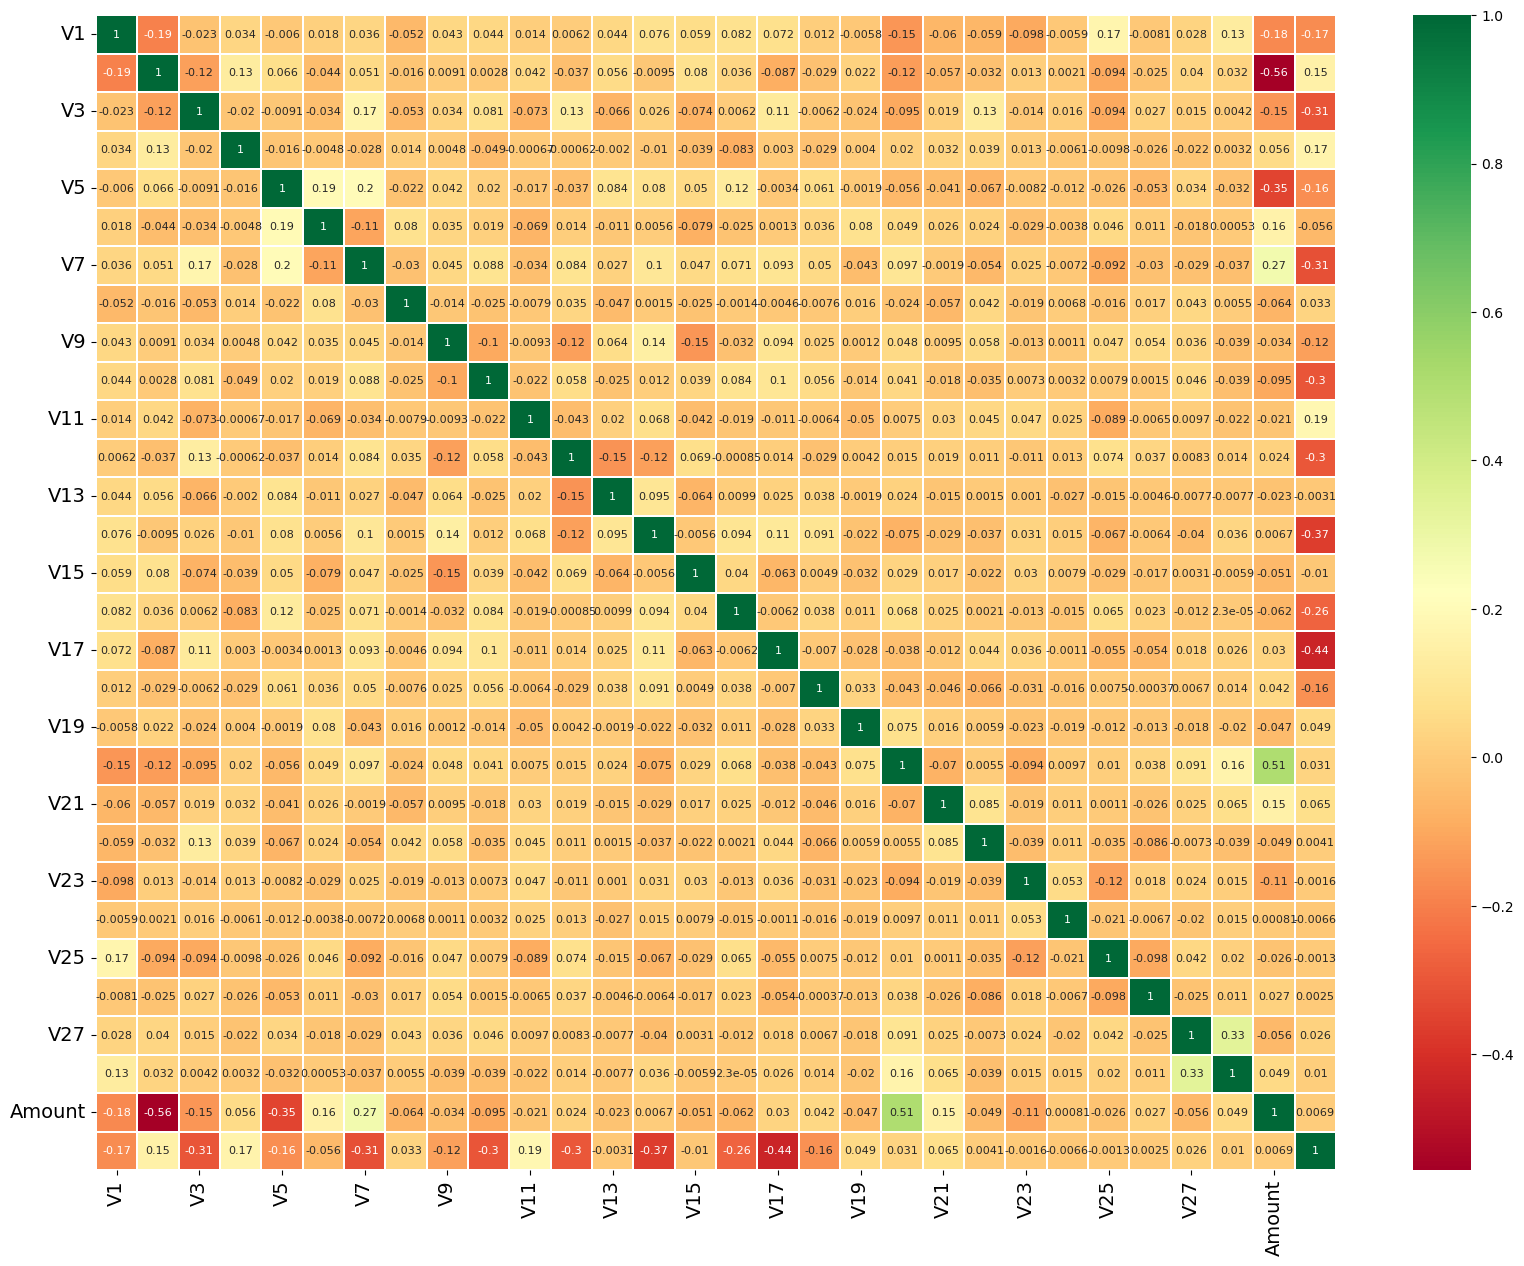

In [15]:
#상관 계수
sns.heatmap(df_final.drop(columns=['Time24']).corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':8})
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#앞으로 학습할 7가지 모델
'''
1)Logistic Regression
회귀 분석

2)Support Vector Machines(Linear and radial)
데이터 포인트를 잘 분리하는 선, 면을 찾는 모델

3)Decision Tree
데이터를 질답을 통해 나무 형태로 규칙을 찾아가는 모델 

3)Random Forest
Decision Tree 모델들을 약간씩 변형하여 학습한 뒤, 각 모델들의 결과를 종합하여 최종 결정을 내리는 모델 

5)K-Nearest Neighbours
가장 가까운 K개의 데이터를 보고 분류

6)Naive Bayes
베이즈 정리에 기반한 분류 모델(각 변수가 독립적이라 가정)
'''

In [16]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from hyperopt import hp
from sklearn.model_selection import KFold
from hyperopt import fmin, tpe, Trials
from xgboost import plot_importance
import lightgbm as lgbm  
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, confusion_matrix

In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X_features = df_final.drop(columns=['Class'])

y_labels = df_final['Class']

numeric_features = X_features.columns.drop("Time24")
categorical_features = ['Time24']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features), # 숫자형 컬럼은 StandardScaling
        ('cat', OneHotEncoder(), categorical_features)  # 범주형 컬럼은 OneHotEncoding
    ])

X_features = preprocessor.fit_transform(X_features)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0) #학습, 테스트 데이터 셋 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)#학습, 검증 데이터 셋 분리

In [23]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=4, shuffle=True, random_state=22)

cv_means = []
cv_stds = []

classifiers = [
    'Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 
    'Decision Tree', 'Naive Bayes', 'Random Forest', 
    'XGBoost', 'LightGBM']

models = [
    svm.SVC(kernel='linear'), #Linear Support Vector Machine(linear-SVM)
    svm.SVC(kernel='rbf'), #Radial Support Vector Machines(rbf-SVM)
    LogisticRegression(), #Logistic Regression
    KNeighborsClassifier(n_neighbors=9), #KNN
    DecisionTreeClassifier(), #Decision Tree
    GaussianNB(), #Naive Gaussian
    RandomForestClassifier(n_estimators=100), #Random Forest
    XGBClassifier(tree_method = "hist", device = "cuda",early_stopping_rounds=30, eval_metric='auc', use_label_encoder=False), # XGBoost 
    LGBMClassifier(device = "gpu")  # LightGBM 
]

for model in models:

    fold_scores = []
    y_labels_np = y_labels.to_numpy()
    
    for train_index, val_index in kfold.split(X_features):

        X_train_fold, X_val_fold = X_features[train_index], X_features[val_index]
        y_train_fold, y_val_fold = y_labels_np[train_index], y_labels_np[val_index]
        
        model.fit(X_train_fold, y_train_fold)
        predictions = model.predict(X_val_fold)
        score = f1_score(y_val_fold, predictions, average='macro')
        fold_scores.append(score)
    

    cv_means.append(np.mean(fold_scores))
    cv_stds.append(np.std(fold_scores))


new_models_dataframe = pd.DataFrame({
    'KFold Mean F1 Score': cv_means,
    'Std': cv_stds
}, index=classifiers)


new_models_dataframe.sort_values(by='KFold Mean F1 Score', ascending=False)

C:\Users\Coco\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:39:34] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Coco\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:39:34] WARNING: D:\bld\xgboost-split_1733179550881\work\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
C:\Users\Coco\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:39:34] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: {

[LightGBM] [Info] Number of positive: 265, number of negative: 125967
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7419
[LightGBM] [Info] Number of data points in the train set: 126232, number of used features: 41
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (3.85 MB) transferred to GPU in 0.004378 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002099 -> initscore=-6.164045
[LightGBM] [Info] Start training from score -6.164045


C:\Users\Coco\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 279, number of negative: 125953
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7419
[LightGBM] [Info] Number of data points in the train set: 126232, number of used features: 41
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (3.85 MB) transferred to GPU in 0.004273 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002210 -> initscore=-6.112452
[LightGBM] [Info] Start training from score -6.112452


C:\Users\Coco\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 266, number of negative: 125967
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7419
[LightGBM] [Info] Number of data points in the train set: 126233, number of used features: 41
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (3.85 MB) transferred to GPU in 0.003921 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002107 -> initscore=-6.160279
[LightGBM] [Info] Start training from score -6.160279


C:\Users\Coco\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 270, number of negative: 125963
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 7419
[LightGBM] [Info] Number of data points in the train set: 126233, number of used features: 41
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 30 dense feature groups (3.85 MB) transferred to GPU in 0.004430 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002139 -> initscore=-6.145322
[LightGBM] [Info] Start training from score -6.145322


C:\Users\Coco\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


KeyError: 'CV Mean F1 Score'

In [24]:
new_models_dataframe.sort_values(by='KFold Mean F1 Score', ascending=False)

,KFold Mean F1 Score,Std
Random Forest,0.960286,0.013015
XGBoost,0.960184,0.014417
Logistic Regression,0.957074,0.014344
Linear Svm,0.951118,0.015736
KNN,0.947204,0.007460
Decision Tree,0.927551,0.021878
Radial Svm,0.904328,0.013773
LightGBM,0.760234,0.088935
Naive Bayes,0.561835,0.004934


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc

lr = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=100, random_state=42) 
xgb = XGBClassifier(eval_metric='auc', random_state=42)

bagging_lr = BaggingClassifier(estimator=lr, n_estimators=5, random_state=42)
bagging_rfc = BaggingClassifier(estimator=rfc, n_estimators=5, random_state=42)
bagging_xgb = BaggingClassifier(estimator=xgb, n_estimators=5, random_state=42)

models = {
    "Bagged Logistic Regression": bagging_lr,
    "Bagged Random Forest": bagging_rfc,
    "Bagged XGBoost": bagging_xgb
}


for name, model in models.items():

    model.fit(X_train, y_train)   
    predictions = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    

    f1 = f1_score(y_test, predictions, average='macro')
    print(f"{name} F1 Score: {f1:.4f}\n")
    
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    


Bagged Logistic Regression F1 Score: 0.9615



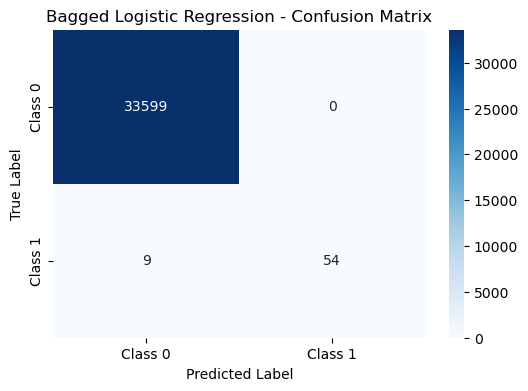

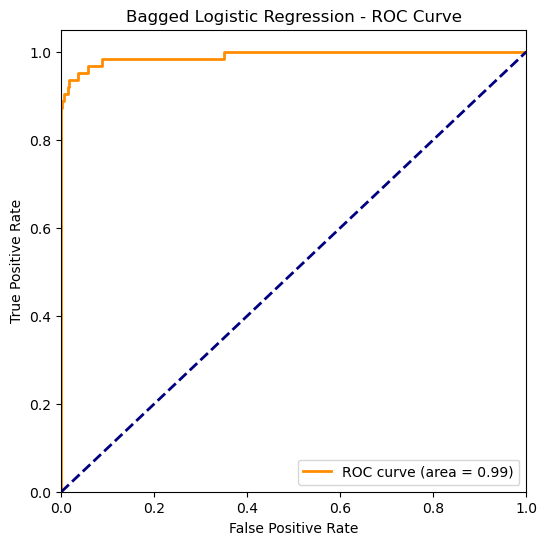

Bagged Random Forest F1 Score: 0.9615



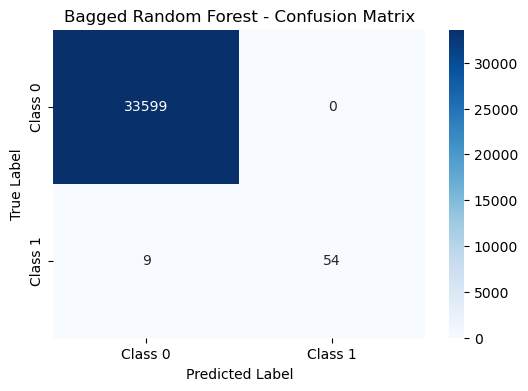

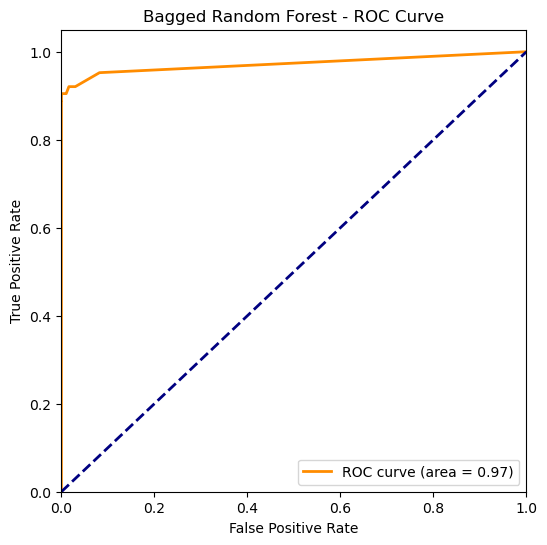

Bagged XGBoost F1 Score: 0.9705



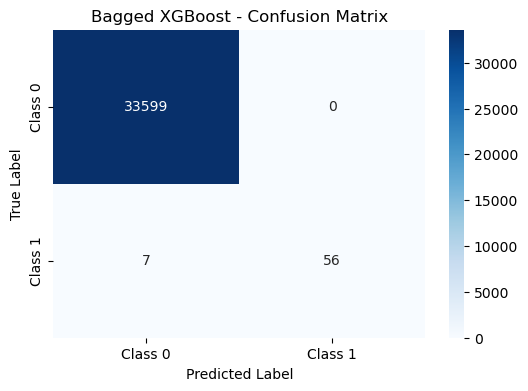

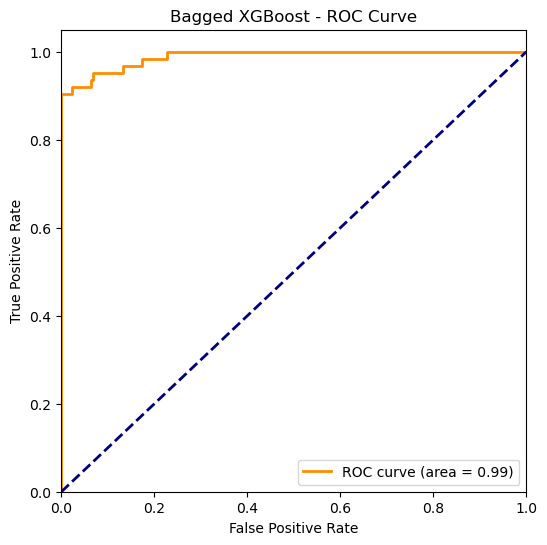

In [29]:
#Logistic Regression,Random Forest,XGBoost가 각각 5개 씩 들어간 앙상블 모델 생성
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

lr = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=100, random_state=42) 
xgb = XGBClassifier(tree_method = "hist", device = "cuda",eval_metric='auc', random_state=42)

bagging_lr = BaggingClassifier(estimator=lr, n_estimators=5, random_state=42)
bagging_rfc = BaggingClassifier(estimator=rfc, n_estimators=5, random_state=42)
bagging_xgb = BaggingClassifier(estimator=xgb, n_estimators=5, random_state=42)

models = {
    "Bagged Logistic Regression": bagging_lr,
    "Bagged Random Forest": bagging_rfc,
    "Bagged XGBoost": bagging_xgb
}


for name, model in models.items():

    model.fit(X_train, y_train)   
    predictions = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    

    f1 = f1_score(y_test, predictions, average='macro')
    print(f"{name} F1 Score: {f1:.4f}\n")
    
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [61]:
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)}


# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(tree_method = "hist", device = "cuda",
                            n_estimators=1000, random_state=156, eval_metric='auc',early_stopping_rounds=50,
                            max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),                            
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate']
                           )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        xgb_clf.fit(X_tr, y_tr,eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [62]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30),
            show_progressbar=True)

print('best:', best)

[0]	validation_0-auc:0.93659	validation_1-auc:0.92389                                                                  
[1]	validation_0-auc:0.93878	validation_1-auc:0.92351                                                                  
[2]	validation_0-auc:0.93864	validation_1-auc:0.92330                                                                  
[3]	validation_0-auc:0.93855	validation_1-auc:0.92317                                                                  
[4]	validation_0-auc:0.93855	validation_1-auc:0.92317                                                                  
[5]	validation_0-auc:0.93855	validation_1-auc:0.92317                                                                  
[6]	validation_0-auc:0.93855	validation_1-auc:0.92317                                                                  
[7]	validation_0-auc:0.93855	validation_1-auc:0.92317                                                                  
[8]	validation_0-auc:0.93855	validation_

In [64]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_c2 = XGBClassifier(tree_method = "hist", device = "cuda",n_estimators=1000, 
                        eval_metric='auc',early_stopping_rounds=50, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)   
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_c2.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_c2.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.93270	validation_1-auc:0.89718
[1]	validation_0-auc:0.93980	validation_1-auc:0.91411
[2]	validation_0-auc:0.94207	validation_1-auc:0.91398
[3]	validation_0-auc:0.94426	validation_1-auc:0.91366
[4]	validation_0-auc:0.94412	validation_1-auc:0.91347
[5]	validation_0-auc:0.94413	validation_1-auc:0.91346
[6]	validation_0-auc:0.94413	validation_1-auc:0.91348
[7]	validation_0-auc:0.94413	validation_1-auc:0.91352
[8]	validation_0-auc:0.94413	validation_1-auc:0.91352
[9]	validation_0-auc:0.94392	validation_1-auc:0.91319
[10]	validation_0-auc:0.94245	validation_1-auc:0.91687
[11]	validation_0-auc:0.94420	validation_1-auc:0.92158
[12]	validation_0-auc:0.94637	validation_1-auc:0.92116
[13]	validation_0-auc:0.94637	validation_1-auc:0.92116
[14]	validation_0-auc:0.94637	validation_1-auc:0.92116
[15]	validation_0-auc:0.94642	validation_1-auc:0.92127
[16]	validation_0-auc:0.94642	validation_1-auc:0.92127
[17]	validation_0-auc:0.94643	validation_1-auc:0.92127
[18]	validation_0-au

In [65]:
df_test = pd.read_csv('modulabs-ds5-credit-card-fraud-detection/test.csv')
df_test = df_test.drop_duplicates() 
ids = df_test['id']
df_test = df_test.drop('id', axis=1)

df_test['Time'] = df_test['Time'].astype(int)
df_test['Hour24'] = (df_test['Time'] // 3600) % 24
df_test['Time_index'] = (df_test['Hour24'] // 2).astype(int)

labels_24H = [f'{i*2}-{(i+1)*2}H' for i in range(12)]
df_test['Time24'] = df_test['Time_index'].apply(lambda x: labels_24H[x])

df_test = df_test.drop(columns=['Time','Hour24','Time_index'])




In [66]:
X_features = df_final.drop(columns=['Class'])

y_labels = df_final['Class']

numeric_features = X_features.columns.drop("Time24")
categorical_features = ['Time24']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features), # 숫자형 컬럼은 StandardScaling
        ('cat', OneHotEncoder(), categorical_features)  # 범주형 컬럼은 OneHotEncoding
    ])

X_features = preprocessor.fit_transform(X_features)

#원핫 인코딩 때 train test의 열 개수가 달라지는 문제가 발생해서 다시 preprocessor를 정의함
df_test_processed =  preprocessor.transform(df_test)

In [67]:
preds = xgb_c2.predict(df_test_processed)
output = pd.DataFrame({'id': ids,'Class': preds})
#output.head()

sample_submission_df = output
sample_submission_df.to_csv('modulabs-ds5-credit-card-fraud-detection/sample2.csv', index=False)
sample_submission_df.head()

,id,Class
0,170883,0
1,170884,0
2,170885,0
3,170886,0
4,170887,0


In [38]:
print(df_test)

[[-1.28470377 -0.70285154 -0.03446405 ...  0.          0.
   1.        ]
 [-0.79576925  0.20487746  2.65689288 ...  0.          0.
   1.        ]
 [-0.05738611  0.61785449  0.16632402 ...  0.          0.
   1.        ]
 ...
 [-0.4774331   0.0057257   1.9822494  ...  0.          1.
   0.        ]
 [ 0.79851203 -0.13852276 -1.7937307  ...  0.          1.
   0.        ]
 [-0.24058316  0.34884391  1.0301431  ...  0.          1.
   0.        ]]


In [49]:
sst = pd.read_csv('modulabs-ds5-credit-card-fraud-detection/sample_submission.csv')



113923
113923
